## Тестовое задание для Яндекс.Практикума

In [1]:
#!pip install skimpy

In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql

from skimpy import skim

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style(style='whitegrid')
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_palette("Set2")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
logs_12 = 'logs_2022-09-12.db'
logs_13 = 'logs_2022-09-13.db'
logs_14 = 'logs_2022-09-14.db'

connection_12 = sql.connect(logs_12)
connection_13 = sql.connect(logs_13)
connection_14 = sql.connect(logs_14)

## Загрузка и объединение датасетов

In [6]:
def db_load(connection):
    qq = '''SELECT *
        FROM events AS e
        JOIN event_name AS en ON e.event_id = en.id'''

    return pd.read_sql_query(qq, connection, parse_dates=['request_time']).drop(columns='id')

In [7]:
df_12, df_13, df_14 = db_load(connection_12), db_load(connection_13), db_load(connection_14)

df = pd.concat([df_12, df_13, df_14]).reset_index()

In [8]:
skim(df_12)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11207  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ event_id            │     0 │        0 │       17 │    9.1 │     1 │      9 │     24 │      34 │  ▆▇█▇▇▅   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ request_time      │    0 │      0 │    2022-09-12 11:30:11.    │    2022-09-12 18:24:18.    │ None         │  │
│ └───────────────────┴──────┴────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ forecastMarker                │      0 │          0 │                         1.1 │                  12000 │  │
│ │ sender                        │      0 │          0 │                         1.1 │                  12000 │  │
│ │ context                       │      0 │          0 │                         1.1 │                  12000 │  │
│ │ session_id                    │      0 │          0 │                         1.1 │                  12000 │  │
│ │ event_name                    │      0 │          0 │                         1.1 │                  12000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
skim(df_13)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 22275  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ event_id             │     0 │        0 │       16 │     9 │     1 │      9 │     24 │      34 │  ▆▇█▆▇▄   │  │
│ └──────────────────────┴───────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ request_time      │    0 │      0 │    2022-09-13 00:10:27.    │    2022-09-13 09:41:15.    │ None         │  │
│ └───────────────────┴──────┴────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ forecastMarker                │      0 │          0 │                           1 │                  23000 │  │
│ │ sender                        │      0 │          0 │                           1 │                  23000 │  │
│ │ context                       │      0 │          0 │                           1 │                  23000 │  │
│ │ session_id                    │      0 │          0 │                           1 │                  23000 │  │
│ │ event_name                    │      0 │          0 │                           1 │                  23000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
skim(df_14)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11249  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ event_id            │     0 │        0 │       15 │    8.5 │     1 │      8 │     23 │      31 │  ▆███▅▆   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ request_time      │    0 │      0 │    2022-09-14 00:09:39.    │    2022-09-14 06:07:47.    │ None         │  │
│ └───────────────────┴──────┴────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ forecastMarker                │      0 │          0 │                           1 │                  12000 │  │
│ │ sender                        │      0 │          0 │                           1 │                  12000 │  │
│ │ context                       │      0 │          0 │                           1 │                  12000 │  │
│ │ session_id                    │      0 │          0 │                           1 │                  12000 │  │
│ │ event_name                    │      0 │          0 │                           1 │                  12000 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Отсортируем весь датасет по времени запросов, для сохранения хронологии событий

In [11]:
df = df.sort_values(by='request_time')

## 1. Рассчет наибольшего шага между событиями

Для начала рассчитаем для всех событий, сколько потребовалось времени от вызова предыдущей задачи до следующей

In [12]:
df['shift'] = df['request_time'] - df['request_time'].shift()

In [13]:
df.head()

,index,forecastMarker,request_time,event_id,sender,context,session_id,event_name,shift
0,0,SelfService/RUS/turnover,2022-09-12 11:30:11.106628,1,test_system,"df = <class 'NoneType'>, sql_query = <class 'N...",6f4277f6df57c4f4e90779966522c876,Инициализируем свойства класса,NaT
1,1,SelfService/RUS/turnover,2022-09-12 11:30:11.111359,29,test_system,None,6f4277f6df57c4f4e90779966522c876,Начинаем получать гипермараметры и регрессоры,0 days 00:00:00.004731
2,2,SelfService/RUS/turnover,2022-09-12 11:30:11.115989,2,test_system,None,6f4277f6df57c4f4e90779966522c876,Переход в функцию getParametrsAndRegressors,0 days 00:00:00.004630
3,3,SelfService/RUS/turnover,2022-09-12 11:30:12.761754,3,test_system,Найдено 1 строк с параметрами,6f4277f6df57c4f4e90779966522c876,Выход из функции getParametrsAndRegressors с п...,0 days 00:00:01.645765
4,4,SelfService/RUS/turnover,2022-09-12 11:30:12.770134,5,test_system,None,6f4277f6df57c4f4e90779966522c876,Записали в свойства класса гиперпараметры и ре...,0 days 00:00:00.008380


**Рассчет времени между событиями всего датасета**

In [14]:
df.iloc[df[df['shift'] == df['shift'].max()].index[0]-1]['event_id']

31

In [15]:
df.iloc[df[df['shift'] == df['shift'].max()].index[0]]['event_id']

1

In [16]:
df.iloc[33481]

index                                         22274
forecastMarker    weekly_report.SS:no_segment_users
request_time             2022-09-13 09:41:15.078643
event_id                                         31
sender                        test.weekly_report.ss
context                   Отдан датафрейм: (895, 4)
session_id         d637d1b6d2b70fd088e2ea44959483cb
event_name                   JSON отправлен обратно
shift                        0 days 00:00:00.006806
Name: 33481, dtype: object

In [17]:
df.iloc[33482]

index                                                             0
forecastMarker                                                 None
request_time                             2022-09-14 00:09:39.234361
event_id                                                          1
sender                                                         None
context           df = <class 'pandas.core.frame.DataFrame'>, sq...
session_id                         ec6a82e4a1b9b4dc467639eb1a5d6987
event_name                           Инициализируем свойства класса
shift                                        0 days 14:28:24.155718
Name: 33482, dtype: object

**Рассчет времени события внутри сессий**

Для рассчета максимального времени на шаг события - удалим из рассчета событие с `event_id` == 1 и найдем максимальное затраченное время внутри каждой сессии

In [18]:
df.iloc[df[df['shift'] == df[df['event_id']!= 1]['shift'].max()].index[0]-1]

index                                                          5742
forecastMarker                  weekly_report.care:count_of_jivo_SA
request_time                             2022-09-14 05:20:53.759918
event_id                                                          6
sender                                           weekly_report.care
context                                                        None
session_id                         4dcab2af4573ced8251fb7433174ba15
event_name        Начинаем читать данные из BQ по полученному SQ...
shift                                        0 days 00:00:00.005893
Name: 39224, dtype: object

In [19]:

df.iloc[df[df['shift'] == df[df['event_id']!= 1]['shift'].max()].index[0]]

index                                                         5743
forecastMarker                 weekly_report.care:count_of_jivo_SA
request_time                            2022-09-14 05:22:40.308128
event_id                                                         7
sender                                          weekly_report.care
context             Получили из BQ набор данных размером: (548, 2)
session_id                        4dcab2af4573ced8251fb7433174ba15
event_name        Получили данные из BQ по полученному SQL запросу
shift                                       0 days 00:01:46.548210
Name: 39225, dtype: object

In [20]:
count = None
bb = None
max_lag = pd.Timedelta(0)

for i in range(1, len(df['event_id'])):
    if df['event_id'][i] != 1:
        shift = df['request_time'][i] - df['request_time'][i-1]
        if max_lag < shift:
            max_lag = shift
            bb = df.iloc[i]
    if df['event_id'][i] == 1:
        count = df['request_time'][i]
        shift_2 = df['request_time'][i+1] - count
        if max_lag < shift_2:
            max_lag = shift_2
            bb = df.iloc[i]
print(max_lag)

0 days 00:01:46.548210


### 1. Вывод

Очевидно, что самый большой интервал между последним и первым шагами разных дней:

0 days 14:28:24.155718

между `event_id` == 1 из лог файла 2022-09-14 и `event_id` == 31 лог файла 2022-09-13


**Однако, если посмотреть внутри сессий**:

Самый большой интервал показали:

0 days 00:01:46.548210

между `event_id` == 6 и `event_id` == 7 лог файла 2022-09-14

## 2. Разброс интервала времени между событиями

In [21]:
def time_shift(data_in):
    data_out = data_in.copy()
    data_out = data_out.sort_values(by='request_time')
    data_out['shift'] = data_out['request_time'] - data_out['request_time'].shift()
    data_out['shift_sec'] = data_out['shift'] / np.timedelta64(1, 's')
    data_out = data_out[data_out['event_id'] != 1]

    return data_out


def step_disp(data_in):
    max_dist = 0
    longest_sender = ''
    event_id = 0
    event_name = ''

    for i in data_in['sender'].unique():
        sender = data_in[data_in['sender'] == i]
        for j in sorted(data_in['event_id'].unique()):
            dist = sender[sender['event_id'] == j]['shift_sec'].max() - sender[sender['event_id'] == j]['shift_sec'].min()
            if dist > max_dist:
                max_dist = dist
                longest_sender = sender['sender'].unique()[0]
                event_id = j
                event_name = data_in[data_in['event_id'] == event_id]['event_name'].iloc[0]

    return event_id, event_name, max_dist, longest_sender


def print_disp(data_in):
    event_id, event_name, max_dist, longest_sender = step_disp(data_in)
    print(f'Ключ события: {event_id}')
    print(f'Название события: {event_name}')
    print(f'Величина разброса: {max_dist} секунд')
    print(f'Имя отправителя: {longest_sender}')

    data_in[data_in['sender'] == longest_sender].boxplot(by ='event_id', column ='shift_sec')

Ключ события: 7
Название события: Получили данные из BQ по полученному SQL запросу
Величина разброса: 48.737023 секунд
Имя отправителя: weekly_report.care


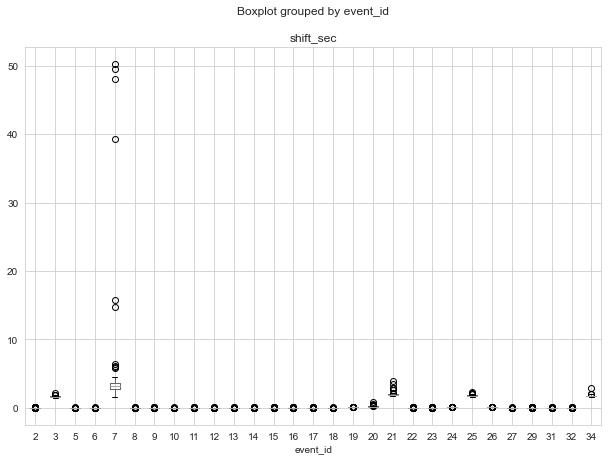

In [22]:
df_12_shift = time_shift(df_12)
print_disp(df_12_shift)

Ключ события: 7
Название события: Получили данные из BQ по полученному SQL запросу
Величина разброса: 62.559577999999995 секунд
Имя отправителя: test.weekly_report.care


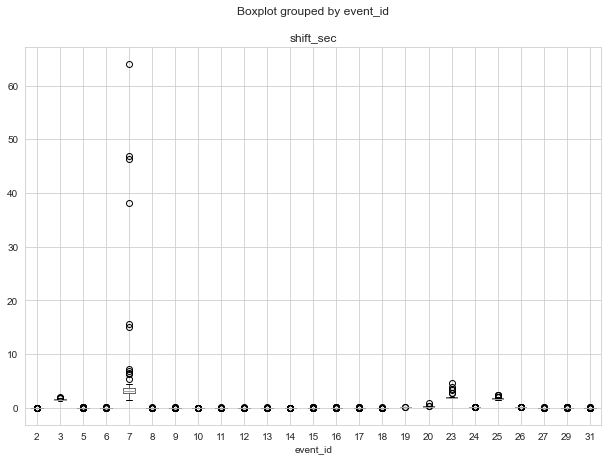

In [23]:
df_13_shift = time_shift(df_13)
print_disp(df_13_shift)

Ключ события: 7
Название события: Получили данные из BQ по полученному SQL запросу
Величина разброса: 106.378547 секунд
Имя отправителя: weekly_report.care


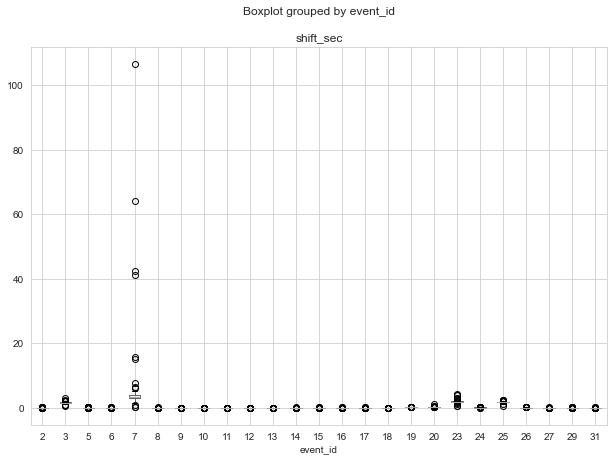

In [24]:
df_14_shift = time_shift(df_14)
print_disp(df_14_shift)

Ключ события: 7
Название события: Получили данные из BQ по полученному SQL запросу
Величина разброса: 106.378547 секунд
Имя отправителя: weekly_report.care


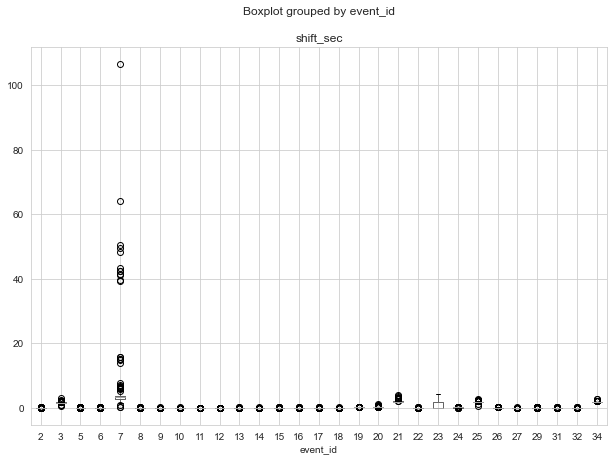

In [25]:
df_test = time_shift(df)
print_disp(df_test)

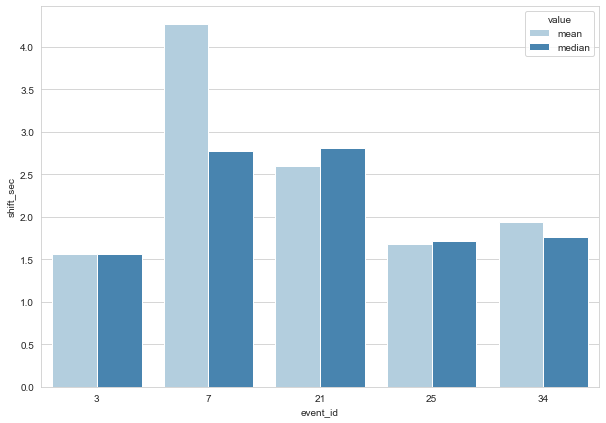

In [26]:
mean_gr = df_test.groupby(
    [df_test["event_id"]])["shift_sec"].mean().sort_values(ascending=False).head()
median_gr = df_test.groupby(
    [df_test["event_id"]])["shift_sec"].median().sort_values(ascending=False).head()

m_1 = pd.DataFrame(mean_gr).reset_index()
m_1['value'] = 'mean'
m_2 = pd.DataFrame(median_gr).reset_index()
m_2['value'] = 'median'

joined = pd.concat([m_1, m_2])


sns.barplot(x = "event_id", y = "shift_sec", hue = "value", data = joined, palette='Blues')
plt.show()

Посмотрим как это выглядит на графике

<AxesSubplot:title={'center':'shift_sec'}, xlabel='event_id'>

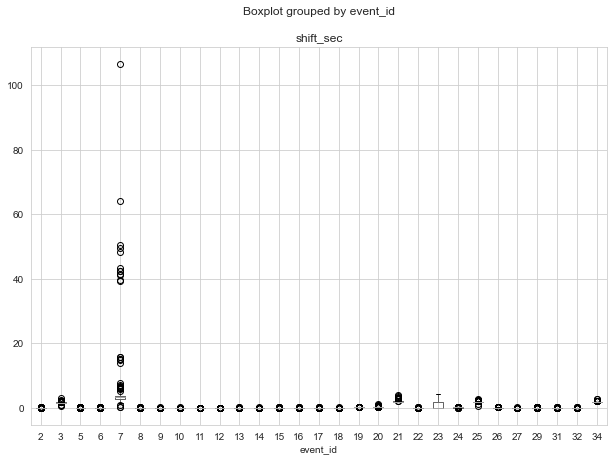

In [27]:
df_test[df_test['sender'] == 'weekly_report.care'].boxplot(by ='event_id', column ='shift_sec')

**Вывод**

Самый большой разброс затрат времени у задачи с идентификатором 7

**Ключ события:** 7

**Название события:** Получили данные из BQ по полученному SQL запросу

**Величина разброса:** 106.378547 секунд

**Имя отправителя:** weekly_report.care

Вполне вероятно, что самый большой разброс у задачи получения данных из-за:

- Не оптимальные SQL запросы
- Сбои в соединении
- Большой объем данных, тк выгружают недельную информацию

## 3. Самая долгая задача

In [28]:
longest_index = df_test.groupby(by='session_id').sum().sort_values(by='shift_sec', ascending=False).head(1).index

In [29]:
df_test[df_test['session_id'] == longest_index[0]]['forecastMarker'].head(1)

39220    weekly_report.care:count_of_jivo_SA
Name: forecastMarker, dtype: object

Посчитаем вместе с доп запросами и будем считать, что это одна задача

In [30]:
s = df_test.copy()

In [31]:
s['session_split'] = s['sender'].apply(lambda x: x.split(' '))

s['session_split'].iloc[25][-1:][0]

'6f4277f6df57c4f4e90779966522c876'

In [32]:
for i in range(len(s)):
    if 'internal_call' in s['session_split'].iloc[i]:
        s['session_id'].iloc[i] = s['session_split'].iloc[i][-1:][0]


s

,index,forecastMarker,request_time,event_id,sender,context,session_id,event_name,shift,shift_sec,session_split
1,1,SelfService/RUS/turnover,2022-09-12 11:30:11.111359,29,test_system,None,6f4277f6df57c4f4e90779966522c876,Начинаем получать гипермараметры и регрессоры,0 days 00:00:00.004731,0.004731,[test_system]
2,2,SelfService/RUS/turnover,2022-09-12 11:30:11.115989,2,test_system,None,6f4277f6df57c4f4e90779966522c876,Переход в функцию getParametrsAndRegressors,0 days 00:00:00.004630,0.004630,[test_system]
3,3,SelfService/RUS/turnover,2022-09-12 11:30:12.761754,3,test_system,Найдено 1 строк с параметрами,6f4277f6df57c4f4e90779966522c876,Выход из функции getParametrsAndRegressors с п...,0 days 00:00:01.645765,1.645765,[test_system]
4,4,SelfService/RUS/turnover,2022-09-12 11:30:12.770134,5,test_system,None,6f4277f6df57c4f4e90779966522c876,Записали в свойства класса гиперпараметры и ре...,0 days 00:00:00.008380,0.008380,[test_system]
5,5,SelfService/RUS/turnover,2022-09-12 11:30:12.780523,6,test_system,None,6f4277f6df57c4f4e90779966522c876,Начинаем читать данные из BQ по полученному SQ...,0 days 00:00:00.010389,0.010389,[test_system]
...,...,...,...,...,...,...,...,...,...,...,...
44726,11244,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.582138,24,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,saveForecastToCSV: выход из функции,0 days 00:00:00.053248,0.053248,[weekly_report.ss]
44727,11245,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.588185,15,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,get_forecast: выход из функции,0 days 00:00:00.006047,0.006047,[weekly_report.ss]
44728,11246,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.594110,16,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,updateForecastAnswer: вход в функцию,0 days 00:00:00.005925,0.005925,[weekly_report.ss]
44729,11247,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.601623,17,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,updateForecastAnswer: выход из функции,0 days 00:00:00.007513,0.007513,[weekly_report.ss]


In [33]:
longest_index_dop = s.groupby(by='session_id').sum().sort_values(by='shift_sec', ascending=False).head(1).index

s[s['session_id'] == longest_index_dop[0]]['forecastMarker'].head(1)

39220    weekly_report.care:count_of_jivo_SA
Name: forecastMarker, dtype: object

**Вывод**

Если мы не учитываем процессы, вызванные отдельно, но внутри одной сессии, и не учитываем время между днями, то самая долгая сессия:

- **weekly_report.care:count_of_jivo_SA**

А если учитываем - то все равно та же самая задача



## 4. Одновременные задачи

In [34]:
df

,index,forecastMarker,request_time,event_id,sender,context,session_id,event_name,shift
0,0,SelfService/RUS/turnover,2022-09-12 11:30:11.106628,1,test_system,"df = <class 'NoneType'>, sql_query = <class 'N...",6f4277f6df57c4f4e90779966522c876,Инициализируем свойства класса,NaT
1,1,SelfService/RUS/turnover,2022-09-12 11:30:11.111359,29,test_system,None,6f4277f6df57c4f4e90779966522c876,Начинаем получать гипермараметры и регрессоры,0 days 00:00:00.004731
2,2,SelfService/RUS/turnover,2022-09-12 11:30:11.115989,2,test_system,None,6f4277f6df57c4f4e90779966522c876,Переход в функцию getParametrsAndRegressors,0 days 00:00:00.004630
3,3,SelfService/RUS/turnover,2022-09-12 11:30:12.761754,3,test_system,Найдено 1 строк с параметрами,6f4277f6df57c4f4e90779966522c876,Выход из функции getParametrsAndRegressors с п...,0 days 00:00:01.645765
4,4,SelfService/RUS/turnover,2022-09-12 11:30:12.770134,5,test_system,None,6f4277f6df57c4f4e90779966522c876,Записали в свойства класса гиперпараметры и ре...,0 days 00:00:00.008380
...,...,...,...,...,...,...,...,...,...
44726,11244,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.582138,24,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,saveForecastToCSV: выход из функции,0 days 00:00:00.053248
44727,11245,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.588185,15,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,get_forecast: выход из функции,0 days 00:00:00.006047
44728,11246,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.594110,16,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,updateForecastAnswer: вход в функцию,0 days 00:00:00.005925
44729,11247,weekly_report.SS:new_users_90d:tiktok,2022-09-14 06:07:47.601623,17,weekly_report.ss,None,7caa7e3d9378310a86ce7e20fc58b561,updateForecastAnswer: выход из функции,0 days 00:00:00.007513


In [35]:
df.groupby([pd.Grouper(key='request_time', freq='T'), 'session_id']).count().max()

index             31
forecastMarker    31
event_id          31
sender            31
context           31
event_name        31
shift             31
dtype: int64

In [36]:
start_time = pd.DataFrame(df.groupby(by='session_id')['request_time'].min().reset_index())

start_time.columns = ['session_id', 'start_of_session']

In [37]:
end_time = pd.DataFrame(df.groupby(by='session_id')['request_time'].max().reset_index())

end_time.columns = ['session_id', 'end_of_session']

In [38]:
parallels = start_time.merge(end_time, on=['session_id'])

In [39]:
parallels = parallels.sort_values(by='start_of_session')

In [40]:
test = parallels.copy()

test

,session_id,start_of_session,end_of_session
694,6f4277f6df57c4f4e90779966522c876,2022-09-12 11:30:11.106628,2022-09-12 11:30:36.249818
1174,ba9c7ee046c9fbdc0c8713c86409bdc3,2022-09-12 11:30:18.666983,2022-09-12 11:30:29.936695
1529,f425376c334840a59b585165f9ca87dc,2022-09-12 12:13:46.808490,2022-09-12 12:13:57.512095
544,58e407a7bc512bc4b282457c05893ebc,2022-09-12 12:14:04.816840,2022-09-12 12:14:15.082298
765,7c25b8a1058e6c036c443b8cd6dd8c69,2022-09-12 12:14:19.332540,2022-09-12 12:14:31.408749
...,...,...,...
1564,fa72d025f3719d3ed2f538afebc52bda,2022-09-14 06:06:53.773223,2022-09-14 06:07:04.552616
784,7efbf3b6d66e51ea2284fffaafc31887,2022-09-14 06:07:05.036734,2022-09-14 06:07:15.720122
542,58cf6093f01da7f06a5b55580ba80795,2022-09-14 06:07:16.204119,2022-09-14 06:07:26.420862
1234,c65e04642c4d3a742f78976fadc93f7e,2022-09-14 06:07:26.921552,2022-09-14 06:07:36.054822


In [41]:
id = 0
max = test['end_of_session'].iloc[id]
count = 0
big = 0

for i in range(len(test)):
    if max > test['start_of_session'].iloc[i]:
        count += 1
        if count > big:
            big = count
    else: 
        id += 1

print(count)


2


**Вывод**

При ресемплировании датасета в шаг `1 минута`:

- Получаем **31** параллельных задачи

При точном подсчете, без ресемплирования:

- Получаем **2** задачи

## 5. Незавершенные сессии

In [56]:
datas = [df_12, df_13, df_14]
counts = []

for i in datas:
    counts.append(i[i['event_id'] == 1].shape[0] - i[i['event_id'] == 31].shape[0])

unsuccessful_events = pd.DataFrame(counts, index=['log_12', 'log_13', 'log_14'], columns=['count'])

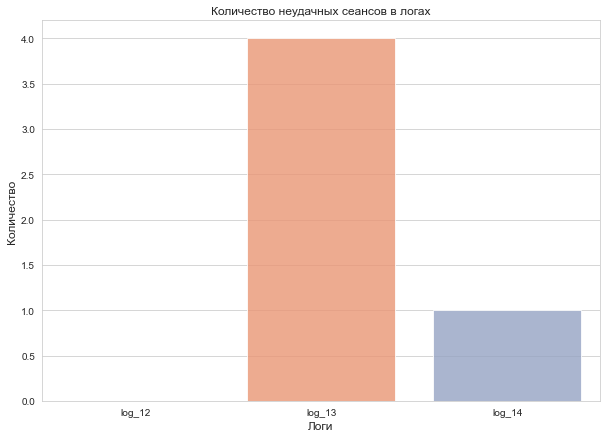

In [57]:
unsuccessful_events = unsuccessful_events.reset_index()
unsuccessful_events.columns = ['log', 'count']

ax = sns.barplot(data = unsuccessful_events, x='log', y='count', alpha=0.8)
plt.title('Количество неудачных сеансов в логах')
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Логи', fontsize=12)
plt.show()

In [63]:
df['day'] = df.request_time.dt.day

In [75]:
unfinished_markers = pd.DataFrame(df.groupby(['session_id', 'forecastMarker', 'day'])['event_id'].unique()).reset_index()

markers_dict = {12 : [],
                13 : [],
                14 : []}


for i in range(len(unfinished_markers.event_id)):
    if 31 not in unfinished_markers.event_id[i]:
        markers_dict[unfinished_markers.day[i]].append(unfinished_markers.forecastMarker[i])


markers_dict


{12: [],
 13: ['SaaS/RUS/turnover/targetMailRu',
  'None',
  'weekly_report.SAAS:turnover',
  'weekly_report.SAAS:new_visitors'],
 14: ['weekly_report.SAAS:new_visitors:utm_medium:organic']}

**Вывод**

Общее количество незавершенных сессий **5:**

* **4 сессии 2022-09-13**
    * 'SaaS/RUS/turnover/targetMailRu'
    * 'None'
    * 'weekly_report.SAAS:turnover'
    * 'weekly_report.SAAS:new_visitors'
* **1 сессия 2022-09-14**
    * 'weekly_report.SAAS:new_visitors:utm_medium:organic'